# <div align="center">Approximation of $\sqrt{1+x}$</div>
---------------------------------------------------------------------

In [1]:
import pandas as pd

import numpy as np
from numpy.linalg import inv

from matplotlib import pyplot as plt
plt.style.use(['ggplot'])
%matplotlib inline

from sklearn.linear_model import LinearRegression as LR

import tensorflow as tf
print('tensorflow versio: ', tf.__version__)

import warnings
warnings.filterwarnings('ignore')

tensorflow versio:  1.14.0


In [ ]:
# np.random.seed(22) 
# tf.set_random_seed(22) 

In [2]:
# Number of data points 
n = 10000

In [3]:
x = np.random.random(n).reshape((n, 1))

In [4]:
y = np.sqrt(1+x)

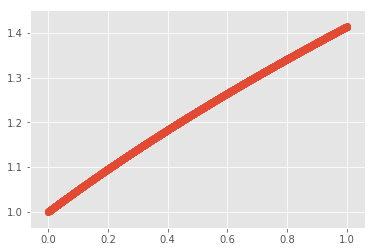

In [5]:
plt.scatter(x, y)
plt.show();

# 1. With closed-form:

For linear regression on a model of the form $y=X \beta$, where $X$ is a matrix with ***full column rank***, the least squares solution,

$\hat{\beta}=argmin||X \beta - y||_{2}$

is given by

$\hat{\beta}=(X^{T}X)^{-1}X^{T}y$

In [6]:
# create vector of ones
int = np.ones(shape=y.shape[0])[..., None]

#and add to feature matrix
X = np.concatenate((int, x), 1)

In [7]:
# calculate coefficients using closed-form solution
coeffs = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [8]:
print('Intercept:       {:0.2f},\nTheta1:          {:0.2f}'.format(coeffs[0, 0],coeffs[1, 0]))
print('Approximated function: ', np.round(coeffs[0, 0], 2), '+', np.round(coeffs[1, 0], 2), '*X' )

Intercept:       1.01,
Theta1:          0.41
Approximated function:  1.01 + 0.41 *X


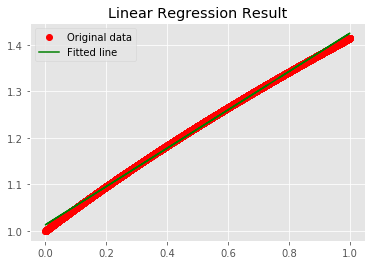

In [19]:
predictions = coeffs[1, 0] * x + coeffs[0, 0]

plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line', color='green')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

# 2. With sklearn

In [9]:
regressor = LR(); regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print('Intercept:       {:0.2f},\nTheta1:          {:0.2f}'.format(regressor.intercept_[0],regressor.coef_[0, 0]))
print('Approximated function: ', np.round(regressor.intercept_[0], 2), '+', np.round(regressor.coef_[0, 0], 2), '*X' )

Intercept:       1.01,
Theta1:          0.41
Approximated function:  1.01 + 0.41 *X


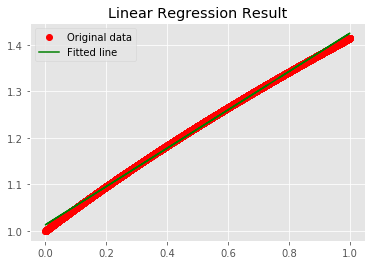

In [20]:
predictions = regressor.coef_[0, 0] * x + regressor.intercept_[0]

plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line', color='green')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

# 3. With Implemented gradient descent

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_{0} -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_{1} -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_{2} -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_{j} -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [11]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    '''
    Parameters:
        X     = Matrix of X with added bias units
        y     = Vector of Y
        theta = Vector of thetas
        learning_rate 
        iterations = no of iterations
    
    Returns:
        np.array - (Returns the final theta vector and array of cost history over no of iterations)
    '''
    m = len(y)
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
    return theta

In [12]:
lr =0.01
n_iter = 100000

theta = np.random.randn(2,1)

theta = gradient_descent(X, y, theta, lr, n_iter)

print('Theta0:          {:0.2f},\nTheta1:          {:0.2f}'.format(theta[0,0], theta[1,0]))
print('Approximated function: ', np.round(theta[0,0], 2), '+', np.round(theta[1,0], 2), '*X' )

Theta0:          1.01,
Theta1:          0.41
Approximated function:  1.01 + 0.41 *X


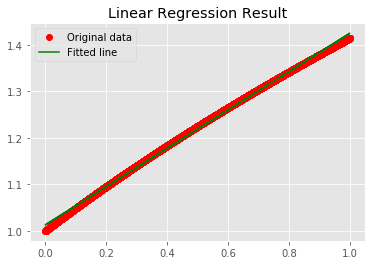

In [21]:
predictions = theta[1,0] * x + theta[0,0]

plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line', color='green')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

# 4. With Tensorflow

In [13]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [14]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [15]:
learning_rate = 0.01
training_epochs = 100

In [16]:
y_pred = tf.add(tf.multiply(X, W), b)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

W0919 02:02:17.988932 11448 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
with tf.Session() as sess: 
    
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
          
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))

    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 0.2724661 W = 0.03711432 b = 0.47051316
Epoch 100 : cost = 0.076749 W = 0.1846485 b = 0.74058753


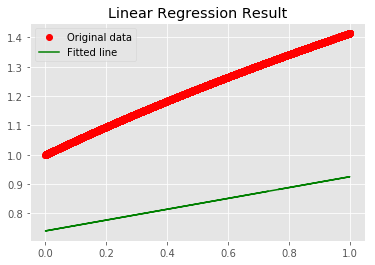

In [22]:
predictions = weight * x + bias

plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line', color='green')
plt.title('Linear Regression Result')
plt.legend()
plt.show()